In [1]:
#Se importan las librerias necesarias para tratar el dataset
%matplotlib inline
from time import time
import glob
import os
import re 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Convolution2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
tf.keras.backend.set_floatx('float64')

In [2]:
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [3]:
TRAIN_DIR = 'data/train/'
TEST_DIR = 'data/test/'

In [4]:
train_cats = sorted(glob.glob(os.path.join(TRAIN_DIR, 'cat*.jpg')), key=natural_key)
train_dogs = sorted(glob.glob(os.path.join(TRAIN_DIR, 'dog*.jpg')), key=natural_key)
train_all = train_cats + train_dogs
y_train = np.concatenate((np.zeros(len(train_cats)), np.ones(len(train_dogs))))
test_all = sorted(glob.glob(os.path.join(TEST_DIR, '*.jpg')), key=natural_key)

In [5]:
tiempo_inicial = time()
t_m = len(train_all)
t_r=50
image_p = np.zeros((t_m,t_r*t_r))
for i in range(t_m):
    image_p[i]=(np.mean(np.asarray(Image.open(train_all[i]).resize((t_r,t_r)),
                                   dtype=np.float64),axis=2)).reshape(1,t_r**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

26.58573317527771


In [6]:
tiempo_inicial = time()
t_m=12500
image_test=np.zeros((t_m,t_r*t_r))
for i in range(t_m):
    image_test[i]=(np.mean(np.asarray(Image.open(test_all[i]).resize((t_r,t_r))
                                      ,dtype=np.float64),axis=2)).reshape(1,t_r**2)
    if i%1000==0:
        print("image[",i,"/",t_m,"]")
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

image[ 0 / 12500 ]
image[ 1000 / 12500 ]
image[ 2000 / 12500 ]
image[ 3000 / 12500 ]
image[ 4000 / 12500 ]
image[ 5000 / 12500 ]
image[ 6000 / 12500 ]
image[ 7000 / 12500 ]
image[ 8000 / 12500 ]
image[ 9000 / 12500 ]
image[ 10000 / 12500 ]
image[ 11000 / 12500 ]
image[ 12000 / 12500 ]
13.084826946258545


In [7]:
x_test = image_test[:300]
y_test_300= np.array([1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,
0,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,0,0,
0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,
1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,0,0,0,1,
1,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,
1,1,1,0])
print("% cats: ", np.mean(y_test_300==0))
print("% dogs: ", np.mean(y_test_300==1))

% cats:  0.5133333333333333
% dogs:  0.4866666666666667


In [8]:
X_train = image_p

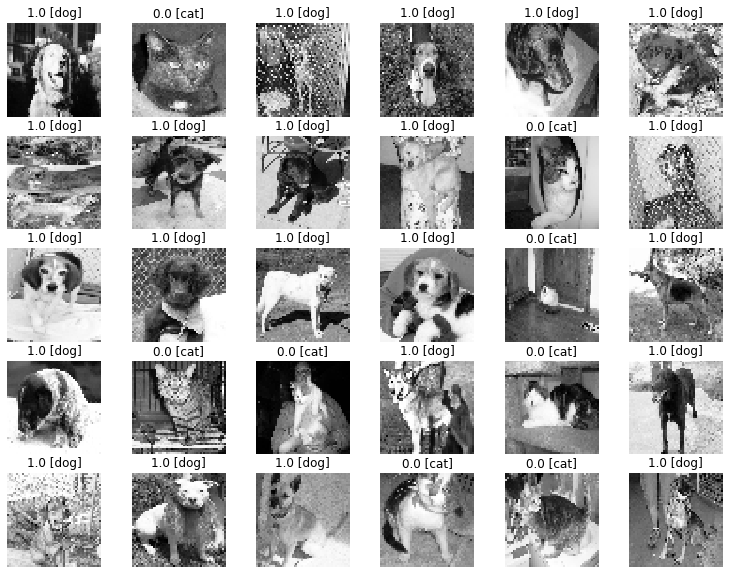

In [9]:
#dibujamos algunas imagenes de train y su respectiva clase
fig = plt.figure(figsize=(13,10))
for i in range(30):
    fig.add_subplot(5,6,(i+1))
    num=np.random.randint(0, len(train_all))
    plt.title("{}".format(str(y_train[num]) + " [cat]" if y_train[num]==0 else str(y_train[num]) + " [dog]"))
    plt.axis(False)
    plt.imshow(X_train[num].reshape(t_r,t_r),cmap = plt.cm.Greys_r)

In [10]:
cats_index = np.random.choice(np.where(y_train==0)[0], size=2500, replace=False)
dogs_index = np.random.choice(np.where(y_train==1)[0], size=2500, replace=False)
all_index = np.concatenate((cats_index,dogs_index))

X_train_5000 = X_train[all_index,:]
y_train_5000 = np.concatenate((np.zeros(len(cats_index)), np.ones(len(dogs_index))))

X_train_5000, y_train_5000 = shuffle(X_train_5000, y_train_5000)

X_train_5000.shape, y_train_5000.shape

((5000, 2500), (5000,))

In [11]:
#para promediar las imagenes
def average(data):
    minimum = np.min(data)
    maximum = np.max(data)
    data = (data-minimum)/(maximum-minimum)
    data = data - np.mean(data)
    return data

X_train_5000 = average(X_train_5000)
x_test = average(x_test)

In [12]:
X_train_5000 = np.resize(X_train_5000, (len(X_train_5000), t_r, t_r, 1))
y_train_5000 = np.resize(y_train_5000, (len(y_train_5000), 1))
X_train_5000 = tf.Variable(X_train_5000, dtype=tf.float64)
y_train_5000 = tf.Variable(y_train_5000, dtype=tf.float64)

In [13]:
model = Sequential()
model.add(Convolution2D(128, 3, 3, padding='same', input_shape=(t_r, t_r, 1), activation='tanh'))
model.add(Convolution2D(64, 3, 3, padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Convolution2D(32, 5, 5, padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Convolution2D(16, 5, 5, padding='same', activation='tanh'))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))  #binary classification

In [14]:
@tf.function
def cost_function(target, prediction):
    """
    compute the cost function for binary clasification problems
    binary cross entropy
    """
    prediction = tf.clip_by_value(prediction, 1e-5, 1-1e-5)
    return -tf.reduce_mean(target*tf.math.log(prediction) + (1-target)*tf.math.log(1-prediction))

In [15]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_5000, y_train_5000)).batch(batch_size)
optimizer = tf.optimizers.RMSprop(learning_rate=.0003)

In [16]:
for batch, target in train_dataset:
    print("Bacth size:", batch.shape)
    prediction = model(batch)
    #print(prediction)
    print("cost function:", cost_function(target, prediction).numpy())
    print("--------------")
    break

Bacth size: (64, 50, 50, 1)
cost function: 0.6940443050221425
--------------


In [17]:
def train_batch(sample, target):
    with tf.GradientTape() as g:
        predictions = model(sample)
        loss = cost_function(target, predictions)
        #loss = tf.losses.binary_crossentropy(target, predictions)
    gradient = g.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradient,model.trainable_variables))
    
    return loss

In [18]:
def train(dataset, epochs):
    accumulated_loss = []
    accumulated_score = []
    for epoch in range(epochs):
        tic = time()
        batch_loss = []
        batch_score = []
        for batch, target in dataset:
            loss = tf.reduce_mean(train_batch(batch, target))
            score = np.mean(((model(batch).numpy()>=0.5)*1)==target)
            batch_loss.append(loss)
            batch_score.append(score)
        accumulated_loss.append(tf.reduce_mean(batch_loss))
        accumulated_score.append(np.mean(batch_score))
        toc = time()
        print("epochs[%d/%d] || loss:%f || accuracy:%f || time:%f[s]"%(epoch, epochs,
                                                                       tf.reduce_mean(batch_loss),
                                                                       np.mean(batch_score),
                                                                       toc-tic))
    return accumulated_loss, accumulated_score

In [19]:
accu_loss, accu_score = train(train_dataset, 50)

epochs[0/50] || loss:0.684003 || accuracy:0.603837 || time:10.352841[s]
epochs[1/50] || loss:0.652366 || accuracy:0.658228 || time:10.191223[s]
epochs[2/50] || loss:0.634937 || accuracy:0.683347 || time:10.102210[s]
epochs[3/50] || loss:0.619405 || accuracy:0.703718 || time:10.141679[s]
epochs[4/50] || loss:0.600793 || accuracy:0.726661 || time:10.137867[s]
epochs[5/50] || loss:0.581101 || accuracy:0.747033 || time:10.257739[s]
epochs[6/50] || loss:0.561552 || accuracy:0.765625 || time:10.128178[s]
epochs[7/50] || loss:0.542757 || accuracy:0.782634 || time:10.084898[s]
epochs[8/50] || loss:0.523102 || accuracy:0.801226 || time:10.077769[s]
epochs[9/50] || loss:0.502859 || accuracy:0.817247 || time:10.088653[s]
epochs[10/50] || loss:0.481637 || accuracy:0.832476 || time:10.130776[s]
epochs[11/50] || loss:0.459904 || accuracy:0.852453 || time:10.128429[s]
epochs[12/50] || loss:0.438180 || accuracy:0.867286 || time:10.185996[s]
epochs[13/50] || loss:0.416057 || accuracy:0.880736 || time:1

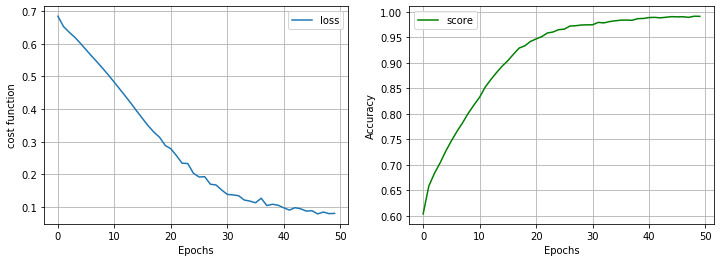

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.grid()
plt.ylabel("cost function")
plt.xlabel("Epochs")
plt.plot(range(len(accu_loss)), accu_loss, label="loss");
plt.legend();
plt.subplot(1,2,2)
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot(range(len(accu_score)), accu_score, label="score", color="green");
plt.legend();

In [21]:
x_test = x_test.reshape(x_test.shape[0],t_r,t_r,1)

In [22]:
predic = (model(x_test).numpy()>=0.5)*1

In [23]:
print("train accuracy:", np.mean((model(X_train_5000).numpy()>=0.5)*1==y_train_5000.numpy()))
print("test accuracy:", np.mean(np.ravel(predic)==y_test_300))

train accuracy: 0.9662
test accuracy: 0.6366666666666667
